# Pyber

**Summary Analysis:**


1. Urban cities have the most drivers across all city types, with a domination of over 85% of all drivers. Though we see a correlation between more drivers and most rides and fare, we don't see the same level of coverage in these areas (i.e. we've seen a drop from 85% drivers to 60-70% rides & fare, respectively). 

2. Rural cities have the least population of total drivers, yet seem to have a lot of variance in the average fares, with ~50% of it's population having average fares greater than other cities. 

3. Suburban cities had about 13% coverage for number of total drivers, yet seems to have an increase in total rides they provide. This may be skewed by an outlier that is present in the dataset. 


In conclusion, it seems that in cities where supply is greater, the fares may be lower in proportion to it's drivers, and in cities where supply is scarce, the fares increase within that population.

In [68]:
#import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
#csv file paths
ride_file = os.path.join('raw_data', 'ride_data.csv')
city_file = os.path.join('raw_data', 'city_data.csv')

#read in csv file using pandas which will convert to a dataframe
ride_df = pd.read_csv(ride_file)
city_df = pd.read_csv(city_file)

#merge the two tables together using city
pyber_df = pd.merge(ride_df, city_df, on= "city",how="inner")
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [70]:
#group by city
city_grouped = pyber_df.groupby('city') #, as_index = False)

#average fare per city
average_fare_city = city_grouped["fare"].mean()

#Total Number of Rides Per City
total_ride_city = city_grouped["ride_id"].count()

#Total Number of Drivers Per City
total_drivers_city = city_grouped["driver_count"].mean()


bubble_df = pd.DataFrame({"Average Fare": average_fare_city, 
                                "Total Rides": total_ride_city, 
                                "Total Drivers": total_drivers_city
                               }).reset_index()

city_type_df = city_df[["city","type"]]

bubble_merge_df = pd.merge(bubble_df, city_type_df, on= "city")
bubble_merge_df.sort_values("Total Drivers", ascending = False).head()

,city,Average Fare,Total Drivers,Total Rides,type
11,Davidtown,22.978095,73,21,Urban
89,South Bryanstad,24.598571,73,21,Urban
122,Williamshire,26.990323,70,31,Urban
119,West Sydneyhaven,22.368333,70,18,Urban
104,Torresshire,24.207308,70,26,Urban


# Bubble Plot

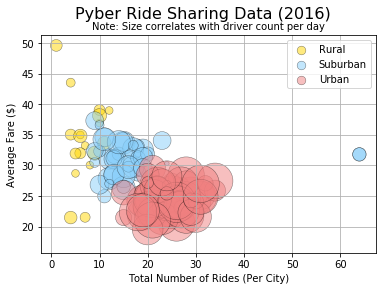

In [71]:
#unique dataframes for type category
rural_df = bubble_merge_df[bubble_merge_df['type'] == 'Rural']
suburban_df = bubble_merge_df[bubble_merge_df['type'] == 'Suburban']
urban_df = bubble_merge_df[bubble_merge_df['type'] == 'Urban']

#color dictionary
city_color = {'Urban': 'lightcoral', 
              'Suburban': 'lightskyblue', 
              'Rural': 'gold'}

#plot rural data
plt.scatter(rural_df['Total Rides'], 
            rural_df['Average Fare'], 
            s = rural_df['Total Drivers']*20, 
            color = city_color['Rural'], 
            edgecolor = 'black', 
            label = 'Rural', 
            alpha = .50,
            linewidth = .50)

#plot suburban data
plt.scatter(suburban_df['Total Rides'], 
            suburban_df['Average Fare'], 
            s = suburban_df['Total Drivers']*20, 
            color = city_color['Suburban'], 
            edgecolor = 'black', 
            label = 'Suburban', 
            alpha = .50,
            linewidth = .50)

#plot urban data
plt.scatter(urban_df['Total Rides'], 
            urban_df['Average Fare'], 
            s = urban_df['Total Drivers']*20, 
            color = city_color['Urban'], 
            edgecolor = 'black', 
            label = 'Urban', 
            alpha = .50,
            linewidth = .50)

#plot grid
plt.grid()

#add legend and adjust sizes of legend to be constant
legend = plt.legend(loc="best")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

#add a super title to the graph and a title with note
plt.suptitle("Pyber Ride Sharing Data (2016)", fontsize = 16)
plt.title("Note: Size correlates with driver count per day", fontsize = 10)

#add x-y labels
plt.xlabel("Total Number of Rides (Per City)", fontsize = 10)
plt.ylabel("Average Fare ($)", fontsize = 10)

#display graph
plt.show()

% of Total Fares by City Type
% of Total Rides by City Type
% of Total Drivers by City Type

# Total Fares by City Type

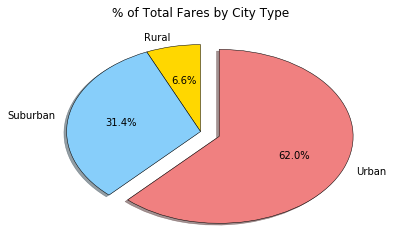

In [72]:
#group by type and select which columns from dataframe to keep in output
type_grouped = pyber_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by type
total_fare_type = type_grouped.sum()['fare']

#each type in pie chart
labels = total_fare_type.index

#apply colors to each value in label
colors = [city_color[n] for n in labels]

#explode criteria to make largest value explode
explode = [0 , 0, .15]

#plot pie chart
plt.pie(total_fare_type, 
        startangle = 90, 
        colors = colors, 
        explode = explode, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True, 
        wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.show()

# Total Rides by City Type

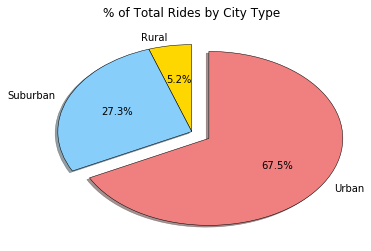

In [73]:
# number of ride per city type
total_ride_type = type_grouped.count()['ride_id']

#each type in pie chart
labels = total_ride_type.index

#plot pie chart
plt.pie(total_ride_type, 
        startangle = 90, 
        explode = explode, 
        colors = colors, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True, 
        wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


plt.title('% of Total Rides by City Type')
plt.show()

# Total Drivers by City Type

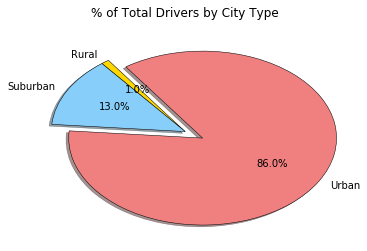

In [74]:
# of driver per city type
total_driver_type = type_grouped.sum()['driver_count']

#each type in pie chart
labels = total_driver_type.index

#plot pie chart
plt.pie(total_driver_type, 
        startangle = 125, 
        explode = explode, 
        colors = colors, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True, 
        wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


plt.title('% of Total Drivers by City Type')
plt.show()